
<h1 align="center" style="color: #cd7f32;"> Solving NP-Complete Problems using Quantum Programming </h1>


<h1> cnx </h1>

In [49]:
def cnx(n,mycircuit,qreg):
    a = 0
    for i in range(1,int(n/2)):
        
        mycircuit.ccx(qreg[2*i],qreg[(2*i)-1],qreg[n+a])
        a+=1
    mycircuit.ccx(qreg[n+a-1],qreg[n+a-2],qreg[0])
    a=0;
    for i in range(1,int(n/2)):
        
        mycircuit.ccx(qreg[2*i], qreg[(2*i)-1], qreg[n+a])
        a+=1

<h1> 3SAT Function </h1>

![](0.png)
![](1.png)

In [9]:
def blackBox (mycircuit,qreg):
  #  for i in range(5):
   #     mycircuit.h(qreg[i])
        
    mycircuit.x(qreg[1])
    mycircuit.cx(qreg[0], qreg[4])
    mycircuit.cx(qreg[1], qreg[4])
    mycircuit.cx(qreg[2], qreg[4])
    mycircuit.mct([qreg[0],qreg[1],qreg[2]],qreg[4],[qreg[3]])

    mycircuit.x(qreg[1])
    mycircuit.draw(output='mpl')
    

<h1> Inversion </h1>

In [10]:
def inversion(circuit,quantum_reg):
    
    
    #step 1

    circuit.h(quantum_reg[2])
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])
    
    #step 2
 
    circuit.x(quantum_reg[2])
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 3
    circuit.mct([ qreg[0],qreg[1],qreg[2]], qreg[4], [qreg[3]])

    #step 4

    circuit.x(quantum_reg[2])
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])
    
    #step 5
   
    circuit.h(quantum_reg[2])
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])

    #step 6
    circuit.x(quantum_reg[4])

00000 is observed 20 times
11000 is observed 34 times
01000 is observed 4 times
10000 is observed 3 times
01100 is observed 23 times
00100 is observed 3 times
10100 is observed 6 times
11100 is observed 7 times


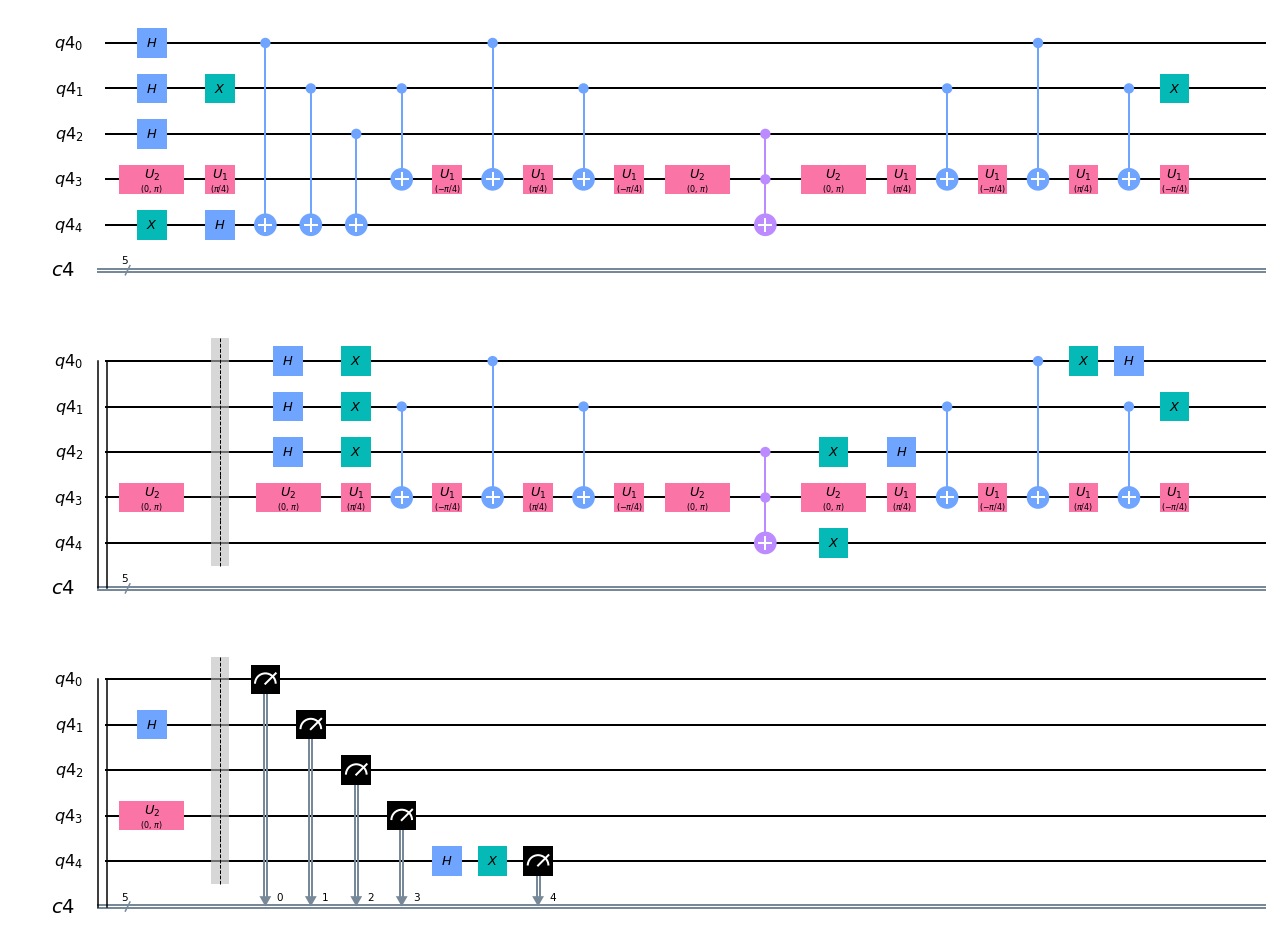

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram   
    
qreg =  QuantumRegister(5) # quantum register with 5 qubits
creg = ClassicalRegister(5) # classical register with 5 bits
mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers
    
for i in range(3):
    mycircuit.h(qreg[i])

    #set ancilla
mycircuit.x(qreg[4])
mycircuit.h(qreg[4])
    
iterations=2

    #Grover's iterations.
for i in range(iterations):
    #query
    blackBox(mycircuit,qreg)
    mycircuit.barrier()
    #inversion
    inversion(mycircuit,qreg)
    mycircuit.barrier()
    
    
#set ancilla back
mycircuit.h(qreg[4])
mycircuit.x(qreg[4]) 
mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(mycircuit)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')


In [54]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram

#all_inputs=['00000','00001','00010','00011','00100','00101','00110','00111','01000','01001','01010','01011',
#            '01100','01101','01110','01111','10000','10001','10010','10011','10100','10101','10110','10111',
#            '11000','11001','11010','11011','11100','11101','11110','11111']

for i in range(7):
    mycircuit.h(qreg[i])

#set ancilla
mycircuit.x(qreg[5])
mycircuit.h(qreg[5])

mycircuit.barrier()

#change the number of iterations
iterations=1

#Grover's iterations.
for i in range(iterations):
    #query
    blackBox(mycircuit,qreg)
    mycircuit.barrier()
    #inversion
    inversion(mycircuit,qreg)
    mycircuit.barrier()
    
    
#set ancilla back
mycircuit.h(qreg[5])
mycircuit.x(qreg[5]) 
    
mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(mycircuit)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')

for input in all_inputs:
    qreg =  QuantumRegister(7) # quantum register with 5 qubits
    creg = ClassicalRegister(7) # classical register with 5 bits
    mycircuit = QuantumCircuit(qreg,creg) # quantum circuit with quantum and classical registers
    
    #initialize the inputs
    if input[0]=='1':
        mycircuit.x(qreg[4]) # set the state of the first qubit to |1>
    if input[1]=='1':
        mycircuit.x(qreg[3]) # set the state of the second qubit to |1>
    if input[2]=='1':
        mycircuit.x(qreg[2]) # set the state of the first qubit to |1>
    if input[3]=='1':
        mycircuit.x(qreg[1]) # set the state of the second qubit to |1>
    if input[4]=='1':
        mycircuit.x(qreg[0]) # set the state of the third qubit to |1>

    cnx(5,mycircuit,qreg)
    blackBox(mycircuit,qreg)
    
    
    # measure the qubits
    mycircuit.measure(qreg,creg)
    
    # execute the circuit 100 times in the local simulator
    job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(mycircuit)
    for outcome in counts: # print the reverse of the outcomes
        print("our input is",input,": ",outcome,"is observed",counts[outcome],"times")
        



1100111 is observed 1 times
0010100 is observed 1 times
1111101 is observed 1 times
1110101 is observed 1 times
0001110 is observed 2 times
1011100 is observed 1 times
1001111 is observed 1 times
0101110 is observed 1 times
0011100 is observed 1 times
our input is 00000 :  0010000 is observed 100 times
our input is 00001 :  0000001 is observed 100 times
our input is 00010 :  0000010 is observed 100 times
our input is 00011 :  0010011 is observed 100 times
our input is 00100 :  0000100 is observed 100 times
our input is 00101 :  0010101 is observed 100 times
our input is 00110 :  0010110 is observed 100 times
our input is 00111 :  0000111 is observed 100 times
our input is 01000 :  0011001 is observed 100 times
our input is 01001 :  0001001 is observed 100 times
our input is 01010 :  0001010 is observed 100 times
our input is 01011 :  0011010 is observed 100 times
our input is 01100 :  0001101 is observed 100 times
our input is 01101 :  0011101 is observed 100 times
our input is 01110 :